# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1550.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           3.39e-46
Time:                        22:07:51   Log-Likelihood:                 14.257
No. Observations:                  50   AIC:                            -20.51
Df Residuals:                      46   BIC:                            -12.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9991      0.065     77.322      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.48866002  4.98487585  5.43947428  5.8233608   6.11794096  6.31817536
  6.43340766  6.4858294   6.50683402  6.53185897  6.59456348  6.72129842
  6.92677694  7.21165711  7.56243384  7.95365772  8.35211626  8.72229063
  9.0321913   9.25861384  9.39095131  9.43293699  9.40203097  9.32655156
  9.24102261  9.18050141  9.17481879  9.24367808  9.39341787  9.61597059
  9.89018802 10.18531585 10.46604654 10.69832025 10.8549208  10.91994714
 10.89142593 10.7816357  10.61508956 10.42450771 10.24544167 10.11043323
 10.04366791 10.0570014  10.14801165 10.30039684 10.48665369 10.67259622
 10.82297237 10.90725581]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.89103951 10.73432304 10.4580421  10.10990649  9.75271908  9.44899948
  9.24567708  9.16260109  9.18768072  9.2798455 ]


## Plot comparison

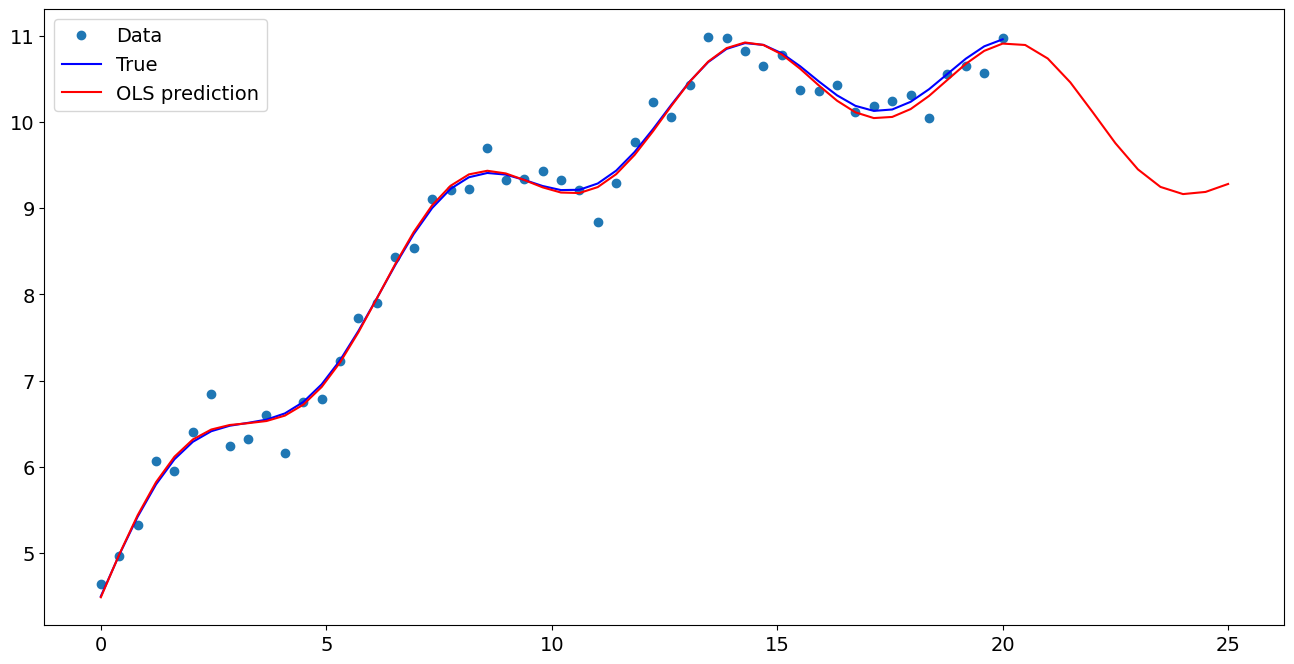

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.999096
x1                  0.500735
np.sin(x1)          0.533853
I((x1 - 5) ** 2)   -0.020417
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.891040
1    10.734323
2    10.458042
3    10.109906
4     9.752719
5     9.448999
6     9.245677
7     9.162601
8     9.187681
9     9.279845
dtype: float64